This program is designed to make a diabetes predictor that will detect on basis of various factors such as number of pregnancies, obesity, bmi, glucose, height, weight, blood pressure, pedigree, age and determine whether the patient has diabetes or not.
The data will be recieved from diabetes.csv. given in the folder.

Here we are going to do it using a support vector machine algotithm, it is one of the most important algorithms in supervised learning. 
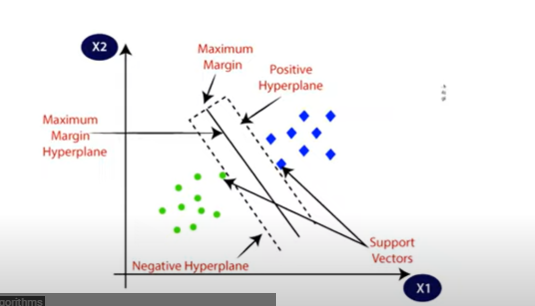

Here we will seperate the negative hyperplane and positive hyperplane using  maximum margin hyperplane and seperating our support vectors.

*Work Flow*
Diabetes data --> Data pre-processing --> Train-test Split --> Support Vendor Machine Classifier --> Output

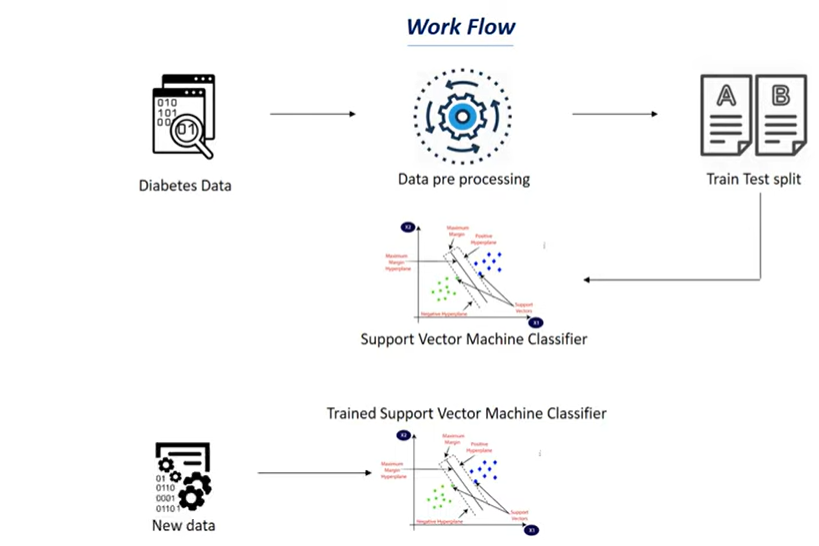 


Starting with the coding part 
Importing the Dependencies

In [1]:
import numpy as np # for multidimensional arrays and matrices
import pandas as pd #for data processing
from sklearn.preprocessing import StandardScaler #removes mean and scales each feature to unit variance (feature scaling)
from sklearn.model_selection import train_test_split #to split the data to training and testing datasets
from sklearn import svm #support vector machine
# svm classifies data by finidng a optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space
from sklearn.metrics import accuracy_score


Data Collection and analysis

PIMA Diabetes Dataset
found in UCI datasets or Kaggle

In [54]:
# loading the dataset diabetes.csv to a pandas dataframe
diabetes_dataset = pd.read_csv("diabetes.csv",header=1)


In [3]:
diabetes_dataset

,A,B,C,D,E,F,G,H,I,Unnamed: 9
0,1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,2,6,148,72,35,0,33.6,0.627,50,1
2,3,1,85,66,29,0,26.6,0.351,31,0
3,4,8,183,64,0,0,23.3,0.672,32,1
4,5,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...,...
764,765,10,101,76,48,180,32.9,0.171,63,0
765,766,2,122,70,27,0,36.8,0.34,27,0
766,767,5,121,72,23,112,26.2,0.245,30,0
767,768,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#printing the first 5 rows of the dataset
diabetes_dataset.head()

,A,B,C,D,E,F,G,H,I,Unnamed: 9
0,1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,2,6,148,72,35,0,33.6,0.627,50,1
2,3,1,85,66,29,0,26.6,0.351,31,0
3,4,8,183,64,0,0,23.3,0.672,32,1
4,5,1,89,66,23,94,28.1,0.167,21,0


In [40]:
diabetes_dataset=diabetes_dataset.drop(labels=9,axis=1)

In [41]:
diabetes_dataset

,A,B,C,D,E,F,G,H,I,Unnamed: 9
0,1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,2,6,148,72,35,0,33.6,0.627,50,1
2,3,1,85,66,29,0,26.6,0.351,31,0
3,4,8,183,64,0,0,23.3,0.672,32,1
4,5,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...,...
764,765,10,101,76,48,180,32.9,0.171,63,0
765,766,2,122,70,27,0,36.8,0.34,27,0
766,767,5,121,72,23,112,26.2,0.245,30,0
767,768,1,126,60,0,0,30.1,0.349,47,1


In [42]:
diabetes_dataset.rename(columns = {'Unnamed: 9':'J'}, inplace = True)

In [55]:
diabetes_dataset

,1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,6,148,72,35,0,33.6,0.627,50,1
1,3,1,85,66,29,0,26.6,0.351,31,0
2,4,8,183,64,0,0,23.3,0.672,32,1
3,5,1,89,66,23,94,28.1,0.167,21,0
4,6,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,765,10,101,76,48,180,32.9,0.171,63,0
764,766,2,122,70,27,0,36.8,0.340,27,0
765,767,5,121,72,23,112,26.2,0.245,30,0
766,768,1,126,60,0,0,30.1,0.349,47,1


In [52]:
diabetes_dataset.shape

(769, 10)

In [56]:
#getting the statistical measures
diabetes_dataset.describe()

,1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,385.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,193.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,385.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,577.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,769.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
diabetes_dataset=diabetes_dataset.drop("1",axis=1)

In [62]:
diabetes_dataset.shape

(768, 9)

In [63]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 represents non-diabetic people
1 represents diabetic people

In [66]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [67]:
#seperating data and labels
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']

In [68]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [69]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Data Standardization

In [70]:
#making data scalar, so that it is easier for the Model to predict better
scalar = StandardScaler()

In [71]:
scalar.fit(X)

StandardScaler()

In [72]:
standardized_data = scalar.transform(X)
#could have also done scalar.fit_transform(X) : does the same thing

In [73]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [74]:
X = standardized_data

In [75]:
Y=diabetes_dataset["Outcome"]

In [76]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train-test split of Data

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [78]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

In [79]:
classifier = svm.SVC(kernel='linear')
#SVC= Support Vector Classfier with a linear function
classifier.fit(X_train,Y_train)


SVC(kernel='linear')

Evaluating our model

Accuracy Score 

In [80]:
#accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [81]:
print("Accuracy score of the training data: ", training_data_accuracy)

Accuracy score of the training data:  0.7866449511400652


In [82]:
#accuracy score on test data
X_test_predict = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, Y_test)


In [83]:
print("The test data accuracy is : ",test_data_accuracy)

The test data accuracy is :  0.7727272727272727


Making a Predictor System

In [91]:
input_data =(7,147,76,0,0,39.4,0.257,43)

#change this input data into numpy array
input_data_asnp = np.asanyarray(input_data)

#reshape the array as we are predicting for one instance
#in prder to predict the data, the model expects a 768, 8 shaped dataset to predict, and hence so that it dosent get confused, we have to reshape the whole input data
input_data_reshaped = input_data_asnp.reshape(1,-1)

#since we have standardized the data, our model cannot make predictions, hence we have to transform it accordingly
#standarize the input data
std_data = scalar.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)

if(prediction[0]==1):
    print("The pateint is diabetic")
else:
    print("The patient is non-diabetic")

[[ 0.93691372  0.81702665  0.35643175 -1.28821221 -0.69289057  0.94014439
  -0.64895193  0.83038113]]
The pateint is diabetic


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
